<font size=7> Latencies Analysis

# Set Up

In [16]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, latencies
from human_hip.animate import animate_latencies
import human_hip.spike_data as spike_data

In [19]:
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle
from ipywidgets import interact_manual, interact
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator

In [20]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [24]:
from ipywidgets import interact_manual, interact
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator

def plot_latency_angle_hist( sd, pairs, pair_latencies, by_firing_rate=True ):
    """
    Inputs:
        sd: SpikeData object
        pairs: np.array of neuron indices (as pairs) for which a connection exists, ex: [[0,1], [0,2], [2,3]]
        by_firing_rate: boolean, if True, the angle histogram will be weighted by the number of latencies for each pair
        late_cutoff_low: integer, the lower bound of the latency cutoff
        late_cutoff_high: integer, the upper bound of the latency cutoff
    Outputs:
        A plot depicting the histogram of the angles of the pairs
    """
    neuron_xy = []
    for neuron in sd.neuron_data[0].values():
        neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
    neuron_xy = np.array(neuron_xy)
    
    # We assume pair point in same direction

    # Creat arrows show angle of information flow from a neuron
    starts = neuron_xy[ pairs[:,0] ]  # Get the x/y locations of the start and end neurons of each pair
    ends = neuron_xy[ pairs[:,1] ]
    angle = np.arctan2(-(ends[:,1]-starts[:,1]), ends[:,0]-starts[:,0]) * -1

    if by_firing_rate:
        latency_counts= []
        for a_latency in pair_latencies:
            latency_counts.append( sum(a_latency>0) )
        latency_counts= np.array(latency_counts)
        angle = np.repeat( angle, latency_counts )

    #n_bins = 30  # You can adjust the number of bins here
    counts, bin_edges = np.histogram(angle,  density=True)  #bins=n_bins,
    bin_width = np.diff(bin_edges)
    cmap = cm.get_cmap('hsv')
    bin_angles= (bin_edges[:-1] - bin_edges.min()) / (bin_edges.max() - bin_edges.min())
    bin_angles = bin_angles[::-1] #+ .05
    bin_colors = cmap(bin_angles)

    ax = plt.subplot(111, polar=True)
    for idx, count in enumerate(counts):
        ax.bar(bin_edges[idx], count, width=bin_width[idx], color=bin_colors[idx], align='edge')
    #ax.set_yticks([0,.1,.2,.3,.4])
    ax.yaxis.set_major_locator(MaxNLocator(5))
    plt.title('Pair Angle Histogram')
    plt.show()


# Get Latencies

In [22]:
count = 0
for i in range(sd.N):
    for j in range(i+1,sd.N):
        count+=1
        if count % 1000 == 0:
            print(f"Count has reached {count}")

Count has reached 1000
Count has reached 2000
Count has reached 3000
Count has reached 4000
Count has reached 5000
Count has reached 6000
Count has reached 7000
Count has reached 8000
Count has reached 9000
Count has reached 10000
Count has reached 11000
Count has reached 12000
Count has reached 13000
Count has reached 14000
Count has reached 15000
Count has reached 16000
Count has reached 17000
Count has reached 18000
Count has reached 19000
Count has reached 20000
Count has reached 21000
Count has reached 22000


In [23]:
# pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
# all_latencies = []
# count = 0
# for i in range(sd.N):
#     for j in range(i+1,sd.N):
#         count+=1
#         if count % 1000 == 0:
#             print(f"Count has reached {count}")
#         pairs.append([i,j])
#         all_latencies.append(  latencies( i, j, sd, ms_cutoff_high=150) )

# dump all_latencies into a pickl file
# with open('200ms_curated_latencies.pkl', 'wb') as f:
#     pickle.dump({"latencies":curated_latencies,"pairs":curated_pairs}, f)
# Load latencies
with open('hc112823_200ms_curated_latencies.pkl', 'rb') as f:
    data = pickle.load(f)
    curated_latencies = data["latencies"]
    curated_pairs = data["pairs"]


Count has reached 1000
Count has reached 2000
Count has reached 3000
Count has reached 4000
Count has reached 5000
Count has reached 6000
Count has reached 7000
Count has reached 8000
Count has reached 9000
Count has reached 10000
Count has reached 11000
Count has reached 12000
Count has reached 13000
Count has reached 14000
Count has reached 15000
Count has reached 16000
Count has reached 17000
Count has reached 18000
Count has reached 19000
Count has reached 20000
Count has reached 21000
Count has reached 22000


(array([4.724e+03, 3.021e+03, 1.817e+03, 1.425e+03, 1.348e+03, 1.261e+03,
        1.189e+03, 9.060e+02, 7.880e+02, 6.950e+02, 5.800e+02, 5.320e+02,
        4.560e+02, 3.960e+02, 3.630e+02, 3.500e+02, 3.280e+02, 2.150e+02,
        2.050e+02, 2.090e+02, 1.680e+02, 1.380e+02, 1.260e+02, 1.350e+02,
        1.260e+02, 7.400e+01, 8.900e+01, 6.000e+01, 5.700e+01, 4.000e+01,
        4.600e+01, 5.000e+01, 4.700e+01, 3.900e+01, 3.000e+01, 3.900e+01,
        2.000e+01, 2.000e+01, 2.500e+01, 2.900e+01, 1.500e+01, 1.000e+01,
        6.000e+00, 1.500e+01, 1.300e+01, 1.200e+01, 1.000e+01, 1.000e+01,
        8.000e+00, 8.000e+00, 4.000e+00, 4.000e+00, 7.000e+00, 3.000e+00,
        7.000e+00, 7.000e+00, 1.000e+00, 5.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+0

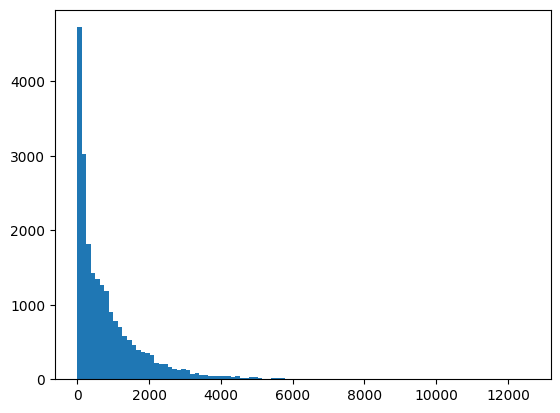

In [25]:
len_all_pair_latencies = []
for i in range(len(all_latencies)):
    len_all_pair_latencies.append(len(all_latencies[i]))
plt.hist(len_all_pair_latencies, bins=100)

In [26]:
curated_latencies = []
curated_pairs = []
for i in range(len(all_latencies)):
    pair_latencies = all_latencies[i]
    if abs(np.mean(pair_latencies))> 20 and len(pair_latencies)>200: #abs(np.median(pair_latencies))> 1.5 and 
        if np.mean(pair_latencies) < 0:
            curated_pairs.append( [ pairs[i][1], pairs[i][0] ] )   #lags_late.append( latency )
            curated_latencies.append( pair_latencies * -1 )
        else:
            curated_pairs.append( pairs[i] ) 
            curated_latencies.append( pair_latencies )
#curated_pairs.append( pairs[i] )
print(len(curated_latencies))
curated_pairs = np.array(curated_pairs)

112


In [ ]:
# with open('200ms_curated_latencies.pkl', 'wb') as f:
#     pickle.dump({"latencies":curated_latencies,"pairs":curated_pairs}, f)


# dump curated latencies into pickle
# with open('200ms_curated_latencies.pkl', 'wb') as f:
#     pickle.dump({"latencies":curated_latencies,"pairs":curated_pairs}, f)

# plot

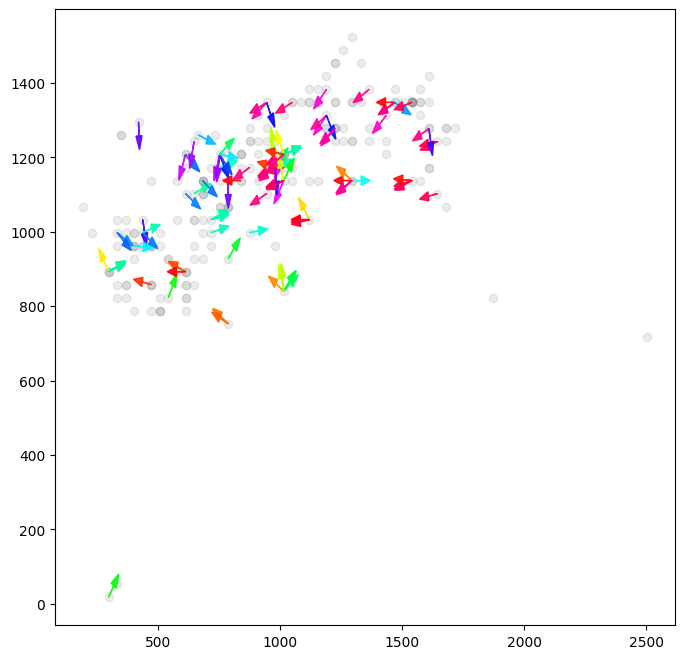

In [27]:
plot_vector_layout( sd, curated_pairs  )

/tmp/ipykernel_23178/840519905.py:17: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_23178/840519905.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


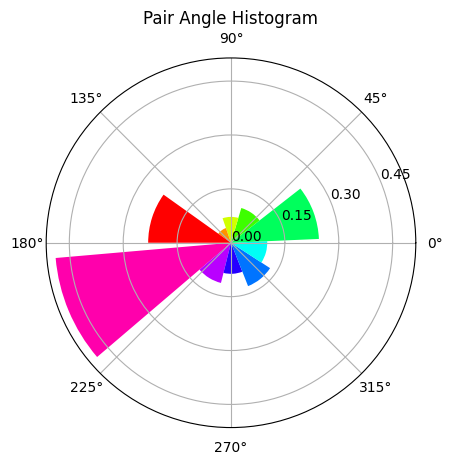

In [28]:
plot_latency_angle_hist( sd, curated_pairs, curated_latencies, by_firing_rate=False)

/tmp/ipykernel_23178/840519905.py:17: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_23178/840519905.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


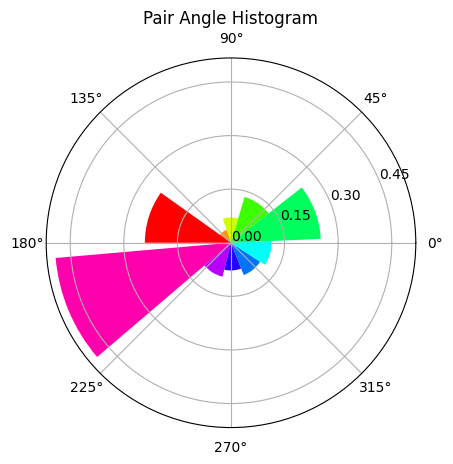

In [29]:
plot_latency_angle_hist( sd, curated_pairs, curated_latencies, by_firing_rate=True )

In [30]:
def pairs_hisogram(pairs, sd, ms_cutoff_high=15):
    @interact
    def plot_pair(pair = (0, len(pairs)-1) ):
        latencies_pair = latencies( pairs[pair,0], pairs[pair,1], sd, ms_cutoff_high=200  )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)

In [31]:
pairs_hisogram( curated_pairs, sd, ms_cutoff_high=200)

interactive(children=(IntSlider(value=55, description='pair', max=111), Output()), _dom_classes=('widget-inter…